# Financial and Economic Data Applications

In [1]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 6))

In [2]:
%matplotlib inline

In [3]:
%pwd

'C:\\Users\\moriya\\Documents\\Python Scripts\\Python for data analysis'

## Data munging topics

### Time series and cross-section alignment

In [6]:
close_px = pd.read_csv('ch11/stock_px.csv', parse_dates=True, index_col=0)
volume = pd.read_csv('ch11/volume.csv', parse_dates=True, index_col=0)
prices = close_px.loc['2011-09-05':'2011-09-14', ['AAPL', 'JNJ', 'SPX', 'XOM']]
volume = volume.loc['2011-09-05':'2011-09-12', ['AAPL', 'JNJ', 'XOM']]

In [7]:
prices

,AAPL,JNJ,SPX,XOM
2011-09-06,379.74,64.64,1165.24,71.15
2011-09-07,383.93,65.43,1198.62,73.65
2011-09-08,384.14,64.95,1185.90,72.82
2011-09-09,377.48,63.64,1154.23,71.01
2011-09-12,379.94,63.59,1162.27,71.84
2011-09-13,384.62,63.61,1172.87,71.65
2011-09-14,389.30,63.73,1188.68,72.64


In [8]:
volume

,AAPL,JNJ,XOM
2011-09-06,18173500.0,15848300.0,25416300.0
2011-09-07,12492000.0,10759700.0,23108400.0
2011-09-08,14839800.0,15551500.0,22434800.0
2011-09-09,20171900.0,17008200.0,27969100.0
2011-09-12,16697300.0,13448200.0,26205800.0


In [9]:
prices * volume

,AAPL,JNJ,SPX,XOM
2011-09-06,6.901205e+09,1.024434e+09,NaN,1.808370e+09
2011-09-07,4.796054e+09,7.040072e+08,NaN,1.701934e+09
2011-09-08,5.700561e+09,1.010070e+09,NaN,1.633702e+09
2011-09-09,7.614489e+09,1.082402e+09,NaN,1.986086e+09
2011-09-12,6.343972e+09,8.551710e+08,NaN,1.882625e+09
2011-09-13,NaN,NaN,NaN,NaN
2011-09-14,NaN,NaN,NaN,NaN


VWAPとは、売買高加重平均価格のことで、当日の取引所で成立した価格を価格ごとの売買高（出来高）で加重平均したものをいいます。 VWAPは、平均的な約定価格として、リアルタイムの日中足チャートに表示されているところもあり、主に機関投資家が株の売買時の目標値として用いています。

In [14]:
vwap = (prices * volume).sum() / volume.sum()

In [15]:
vwap

AAPL    380.655181
JNJ      64.394769
SPX            NaN
XOM      72.024288
dtype: float64

In [16]:
vwap.dropna()

AAPL    380.655181
JNJ      64.394769
XOM      72.024288
dtype: float64

In [17]:
prices.align(volume, join='inner')

(              AAPL    JNJ    XOM
 2011-09-06  379.74  64.64  71.15
 2011-09-07  383.93  65.43  73.65
 2011-09-08  384.14  64.95  72.82
 2011-09-09  377.48  63.64  71.01
 2011-09-12  379.94  63.59  71.84,
                   AAPL         JNJ         XOM
 2011-09-06  18173500.0  15848300.0  25416300.0
 2011-09-07  12492000.0  10759700.0  23108400.0
 2011-09-08  14839800.0  15551500.0  22434800.0
 2011-09-09  20171900.0  17008200.0  27969100.0
 2011-09-12  16697300.0  13448200.0  26205800.0)

In [18]:
s1 = Series(range(3), index=['a', 'b', 'c'])
s2 = Series(range(4), index=['d', 'b', 'c', 'e'])
s3 = Series(range(3), index=['f', 'a', 'c'])
DataFrame({'one': s1, 'two': s2, 'three': s3})

,one,three,two
a,0.0,1.0,NaN
b,1.0,NaN,1.0
c,2.0,2.0,2.0
d,NaN,NaN,0.0
e,NaN,NaN,3.0
f,NaN,0.0,NaN


In [19]:
DataFrame({'one': s1, 'two': s2, 'three': s3}, index=list('face'))

,one,three,two
f,NaN,0.0,NaN
a,0.0,1.0,NaN
c,2.0,2.0,2.0
e,NaN,NaN,3.0


### Operations with time series of different frequencies

In [20]:
ts1 = Series(np.random.randn(3),
             index=pd.date_range('2012-6-13', periods=3, freq='W-WED'))
ts1

2012-06-13    0.006811
2012-06-20   -0.566421
2012-06-27   -0.997091
Freq: W-WED, dtype: float64

In [21]:
ts1.resample('B').mean()


2012-06-13    0.006811
2012-06-14         NaN
2012-06-15         NaN
2012-06-18         NaN
2012-06-19         NaN
2012-06-20   -0.566421
2012-06-21         NaN
2012-06-22         NaN
2012-06-25         NaN
2012-06-26         NaN
2012-06-27   -0.997091
Freq: B, dtype: float64

In [22]:
ts1.resample('B', fill_method='ffill')

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


2012-06-13    0.006811
2012-06-14    0.006811
2012-06-15    0.006811
2012-06-18    0.006811
2012-06-19    0.006811
2012-06-20   -0.566421
2012-06-21   -0.566421
2012-06-22   -0.566421
2012-06-25   -0.566421
2012-06-26   -0.566421
2012-06-27   -0.997091
Freq: B, dtype: float64

In [24]:
ts1.resample('B').ffill()

2012-06-13    0.006811
2012-06-14    0.006811
2012-06-15    0.006811
2012-06-18    0.006811
2012-06-19    0.006811
2012-06-20   -0.566421
2012-06-21   -0.566421
2012-06-22   -0.566421
2012-06-25   -0.566421
2012-06-26   -0.566421
2012-06-27   -0.997091
Freq: B, dtype: float64

In [25]:
dates = pd.DatetimeIndex(['2012-6-12', '2012-6-17', '2012-6-18',
                          '2012-6-21', '2012-6-22', '2012-6-29'])
ts2 = Series(np.random.randn(6), index=dates)
ts2

2012-06-12   -2.901671
2012-06-17    0.822826
2012-06-18   -0.627420
2012-06-21   -1.284292
2012-06-22   -0.024265
2012-06-29    0.443525
dtype: float64

In [26]:
ts1.reindex(ts2.index, method='ffill')

2012-06-12         NaN
2012-06-17    0.006811
2012-06-18    0.006811
2012-06-21   -0.566421
2012-06-22   -0.566421
2012-06-29   -0.997091
dtype: float64

In [27]:
ts2 + ts1.reindex(ts2.index, method='ffill')

2012-06-12         NaN
2012-06-17    0.829637
2012-06-18   -0.620609
2012-06-21   -1.850713
2012-06-22   -0.590686
2012-06-29   -0.553567
dtype: float64

#### Using periods instead of timestamps

In [28]:
gdp = Series([1.78, 1.94, 2.08, 2.01, 2.15, 2.31, 2.46],
             index=pd.period_range('1984Q2', periods=7, freq='Q-SEP'))
infl = Series([0.025, 0.045, 0.037, 0.04],
              index=pd.period_range('1982', periods=4, freq='A-DEC'))
gdp

1984Q2    1.78
1984Q3    1.94
1984Q4    2.08
1985Q1    2.01
1985Q2    2.15
1985Q3    2.31
1985Q4    2.46
Freq: Q-SEP, dtype: float64

In [29]:
infl.index[0:1].month


Int64Index([12], dtype='int64')

In [30]:
infl_q = infl.asfreq('Q-SEP', how='end')

In [31]:
infl_q

1983Q1    0.025
1984Q1    0.045
1985Q1    0.037
1986Q1    0.040
Freq: Q-SEP, dtype: float64

In [32]:
infl_q.reindex(gdp.index, method='ffill')

1984Q2    0.045
1984Q3    0.045
1984Q4    0.045
1985Q1    0.037
1985Q2    0.037
1985Q3    0.037
1985Q4    0.037
Freq: Q-SEP, dtype: float64

### Time of day and "as of" data selection

In [33]:
# Make an intraday date range and time series
rng = pd.date_range('2012-06-01 09:30', '2012-06-01 15:59', freq='T')
# Make a 5-day series of 9:30-15:59 values
rng = rng.append([rng + pd.offsets.BDay(i) for i in range(1, 4)])
ts = Series(np.arange(len(rng), dtype=float), index=rng)
ts

2012-06-01 09:30:00       0.0
2012-06-01 09:31:00       1.0
2012-06-01 09:32:00       2.0
2012-06-01 09:33:00       3.0
2012-06-01 09:34:00       4.0
2012-06-01 09:35:00       5.0
                        ...  
2012-06-06 15:54:00    1554.0
2012-06-06 15:55:00    1555.0
2012-06-06 15:56:00    1556.0
2012-06-06 15:57:00    1557.0
2012-06-06 15:58:00    1558.0
2012-06-06 15:59:00    1559.0
Length: 1560, dtype: float64

In [34]:
from datetime import time
ts[time(10, 0)]

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
dtype: float64

In [35]:
ts.at_time(time(10, 0,0))

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
dtype: float64

In [36]:
ts.between_time(time(10, 0), time(10, 1))

2012-06-01 10:00:00      30.0
2012-06-01 10:01:00      31.0
2012-06-04 10:00:00     420.0
2012-06-04 10:01:00     421.0
2012-06-05 10:00:00     810.0
2012-06-05 10:01:00     811.0
2012-06-06 10:00:00    1200.0
2012-06-06 10:01:00    1201.0
dtype: float64

In [37]:
np.random.seed(12346)

In [38]:
# Set most of the time series randomly to NA
indexer = np.sort(np.random.permutation(len(ts))[700:])
irr_ts = ts.copy()
irr_ts[indexer] = np.nan
irr_ts['2012-06-01 09:50':'2012-06-01 10:00']

2012-06-01 09:50:00    20.0
2012-06-01 09:51:00     NaN
2012-06-01 09:52:00    22.0
2012-06-01 09:53:00    23.0
2012-06-01 09:54:00     NaN
2012-06-01 09:55:00    25.0
2012-06-01 09:56:00     NaN
2012-06-01 09:57:00     NaN
2012-06-01 09:58:00     NaN
2012-06-01 09:59:00     NaN
2012-06-01 10:00:00     NaN
dtype: float64

In [39]:
selection = pd.date_range('2012-06-01 10:00', periods=4, freq='B')
irr_ts.asof(selection)

2012-06-01 10:00:00      25.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1197.0
Freq: B, dtype: float64

### Splicing together data sources

In [41]:
data1 = DataFrame(np.ones((6, 3), dtype=float),
                  columns=['a', 'b', 'c'],
                  index=pd.date_range('6/12/2012', periods=6))
data2 = DataFrame(np.ones((6, 3), dtype=float) * 2,
                  columns=['a', 'b', 'c'],
                  index=pd.date_range('6/13/2012', periods=6))
spliced = pd.concat([data1.loc[:'2012-06-14'], data2.loc['2012-06-15':]])
spliced

,a,b,c
2012-06-12,1.0,1.0,1.0
2012-06-13,1.0,1.0,1.0
2012-06-14,1.0,1.0,1.0
2012-06-15,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0


In [43]:
data2 = DataFrame(np.ones((6, 4), dtype=float) * 2,
                  columns=['a', 'b', 'c', 'd'],
                  index=pd.date_range('6/13/2012', periods=6))
spliced = pd.concat([data1.loc[:'2012-06-14'], data2.loc['2012-06-15':]])
spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,NaN
2012-06-14,1.0,1.0,1.0,NaN
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [44]:
spliced_filled = spliced.combine_first(data2)
spliced_filled

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [45]:
spliced.update(data2, overwrite=False)

In [46]:
spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [47]:
cp_spliced = spliced.copy()
cp_spliced[['a', 'c']] = data1[['a', 'c']]
cp_spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,1.0,2.0,1.0,2.0
2012-06-16,1.0,2.0,1.0,2.0
2012-06-17,1.0,2.0,1.0,2.0
2012-06-18,NaN,2.0,NaN,2.0


### Return indexes and cumulative returns

pip install pandas-datareader

In [111]:
import pandas.io.data as web
price = web.get_data_yahoo('AAPL', '2011-01-01')['Adj Close']
price[-5:]

ImportError: The pandas.io.data module is moved to a separate package (pandas-datareader). After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.

In [112]:
import pandas_datareader.data as web
price = web.get_data_yahoo('AAPL', '2011-01-01')['Adj Close']
price[-5:]

Date
2017-09-26    153.139999
2017-09-27    154.229996
2017-09-28    153.279999
2017-09-29    154.119995
2017-10-02    153.809998
Name: Adj Close, dtype: float64

In [50]:
price['2011-10-03'] / price['2011-3-01'] - 1

0.072399855099073873

In [51]:
returns = price.pct_change()
ret_index = (1 + returns).cumprod()
ret_index[0] = 1  # Set first value to 1
ret_index

Date
2010-12-31    1.000000
2011-01-03    1.021732
2011-01-04    1.027065
2011-01-05    1.035466
2011-01-06    1.034629
2011-01-07    1.042039
                ...   
2017-09-25    3.631548
2017-09-26    3.694023
2017-09-27    3.720316
2017-09-28    3.697400
2017-09-29    3.717663
2017-10-02    3.710185
Name: Adj Close, Length: 1700, dtype: float64

In [52]:
m_returns = ret_index.resample('BM').last().pct_change()
m_returns['2012']

Date
2012-01-31    0.127111
2012-02-29    0.188311
2012-03-30    0.105284
2012-04-30   -0.025970
2012-05-31   -0.010702
2012-06-29    0.010853
2012-07-31    0.045822
2012-08-31    0.093877
2012-09-28    0.002796
2012-10-31   -0.107600
2012-11-30   -0.012375
2012-12-31   -0.090743
Freq: BM, Name: Adj Close, dtype: float64

In [51]:
m_rets = (1 + returns).resample('M', how='prod', kind='period') - 1
m_rets['2012']

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).prod()
  if __name__ == '__main__':


Date
2012-01    0.127111
2012-02    0.188311
2012-03    0.105284
2012-04   -0.025970
2012-05   -0.010702
2012-06    0.010853
2012-07    0.045822
2012-08    0.093877
2012-09    0.002796
2012-10   -0.107600
2012-11   -0.012375
2012-12   -0.090743
Freq: M, Name: Adj Close, dtype: float64

In [57]:
m_rets = (1 + returns).resample('M',kind='period').prod()-1
m_rets['2012']

Date
2012-01    0.127111
2012-02    0.188311
2012-03    0.105284
2012-04   -0.025970
2012-05   -0.010702
2012-06    0.010853
2012-07    0.045822
2012-08    0.093877
2012-09    0.002796
2012-10   -0.107600
2012-11   -0.012375
2012-12   -0.090743
Freq: M, Name: Adj Close, dtype: float64

## Group transforms and analysis

In [58]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 10
np.random.seed(12345)

In [59]:
import random; random.seed(0)
import string

N = 1000
def rands(n):
    choices = string.ascii_uppercase
    return ''.join([random.choice(choices) for _ in range(n)])
tickers = np.array([rands(5) for _ in range(N)])

In [60]:
M = 500
df = DataFrame({'Momentum' : np.random.randn(M) / 200 + 0.03,
                'Value' : np.random.randn(M) / 200 + 0.08,
                'ShortInterest' : np.random.randn(M) / 200 - 0.02},
                index=tickers[:M])

In [61]:
ind_names = np.array(['FINANCIAL', 'TECH'])
sampler = np.random.randint(0, len(ind_names), N)
industries = Series(ind_names[sampler], index=tickers,
                    name='industry')
print(industries)

MYNBI    FINANCIAL
QPMZJ    FINANCIAL
PLSGQ    FINANCIAL
EJEYD    FINANCIAL
TZIRW         TECH
ZTEJD         TECH
XCVKP         TECH
RDLNK         TECH
TUGRP    FINANCIAL
OQIBZ    FINANCIAL
RACXM    FINANCIAL
WZVUA    FINANCIAL
TPKHX         TECH
KWCGS         TECH
HHZEZ    FINANCIAL
ROCCK    FINANCIAL
QPDJR         TECH
JWDRK         TECH
RGZTR    FINANCIAL
SJOCT         TECH
ZMKSH    FINANCIAL
JFGFB         TECH
TVIPC         TECH
CVYEE         TECH
BCWRV    FINANCIAL
MWQIQ         TECH
ZHGVS         TECH
NSIOP    FINANCIAL
VUWZL         TECH
CKTDP    FINANCIAL
SUKGH         TECH
AXIDW         TECH
HLZFK         TECH
NBDZE    FINANCIAL
WHBSU    FINANCIAL
RTVCA         TECH
DUGTS    FINANCIAL
DMCLD    FINANCIAL
BTAGF    FINANCIAL
WDPGX    FINANCIAL
ZBVAR    FINANCIAL
NTDIC    FINANCIAL
HCUJL         TECH
NFBQO    FINANCIAL
BTDWM         TECH
GILXP    FINANCIAL
SFWVG         TECH
YBZVF    FINANCIAL
FKQID    FINANCIAL
TOVFA         TECH
           ...    
XUZXX    FINANCIAL
UMYTA    FIN

In [62]:
by_industry = df.groupby(industries)
by_industry.mean()

,Momentum,ShortInterest,Value
industry,,,
FINANCIAL,0.029485,-0.020739,0.079929
TECH,0.030407,-0.019609,0.080113


In [63]:
by_industry.describe()

Momentum                                            ...     \
             count      mean       std       min       25%    ...      
industry                                                      ...      
FINANCIAL    246.0  0.029485  0.004802  0.017210  0.026263    ...      
TECH         254.0  0.030407  0.005303  0.016778  0.026456    ...      

              Value                                          
                min       25%       50%       75%       max  
industry                                                     
FINANCIAL  0.067025  0.076638  0.079804  0.082718  0.093334  
TECH       0.065253  0.076737  0.080296  0.083353  0.093081  

[2 rows x 24 columns]

In [64]:
# Within-Industry Standardize
def zscore(group):
    return (group - group.mean()) / group.std()

df_stand = by_industry.apply(zscore)

In [65]:
df_stand.groupby(industries).agg(['mean', 'std'])

Momentum      ShortInterest              Value     
                   mean  std          mean  std          mean  std
industry                                                          
FINANCIAL  1.114736e-15  1.0  3.081772e-15  1.0  8.001278e-15  1.0
TECH      -2.779929e-16  1.0 -1.910982e-15  1.0 -7.139521e-15  1.0

In [66]:
# Within-industry rank descending
ind_rank = by_industry.rank(ascending=False)
ind_rank.groupby(industries).agg(['min', 'max'])

Momentum        ShortInterest        Value       
               min    max           min    max   min    max
industry                                                   
FINANCIAL      1.0  246.0           1.0  246.0   1.0  246.0
TECH           1.0  254.0           1.0  254.0   1.0  254.0

In [67]:
# Industry rank and standardize
by_industry.apply(lambda x: zscore(x.rank()))

,Momentum,ShortInterest,Value
MYNBI,-0.091346,-0.976696,-1.004802
QPMZJ,0.794005,1.299919,-0.358356
PLSGQ,-0.541047,-0.836164,-1.679355
EJEYD,-0.583207,-1.623142,0.990749
TZIRW,1.572120,-0.265423,0.374314
ZTEJD,1.395171,0.360703,-1.436006
XCVKP,-0.074863,0.632931,-0.660154
RDLNK,0.238200,-0.319869,0.102086
TUGRP,1.075068,1.665302,1.580983
OQIBZ,1.412345,0.358356,-1.313972


### Group factor exposures

In [68]:
from numpy.random import rand
fac1, fac2, fac3 = np.random.rand(3, 1000)

ticker_subset = tickers.take(np.random.permutation(N)[:1000])

# Weighted sum of factors plus noise
port = Series(0.7 * fac1 - 1.2 * fac2 + 0.3 * fac3 + rand(1000),
              index=ticker_subset)
factors = DataFrame({'f1': fac1, 'f2': fac2, 'f3': fac3},
                    index=ticker_subset)

In [69]:
factors

,f1,f2,f3
FZFPV,0.265639,0.075042,0.623549
DTPES,0.928075,0.606129,0.121780
UJKFH,0.723554,0.672966,0.175533
YKCGU,0.397491,0.492140,0.487649
XAYZH,0.167037,0.052508,0.824024
XKGUD,0.935998,0.153964,0.751013
RACXM,0.884392,0.355995,0.484717
ADOXQ,0.397835,0.209999,0.778081
WIEAP,0.971362,0.300408,0.939537
FYNCS,0.963876,0.816643,0.541790


In [70]:
factors.corrwith(port)

f1    0.402377
f2   -0.680980
f3    0.168083
dtype: float64

In [71]:
pd.ols(y=port, x=factors).beta

AttributeError: module 'pandas' has no attribute 'ols'

In [73]:
import statsmodels.api as sm
model=sm.OLS(y=port, x=factors).fit()

TypeError: __init__() missing 1 required positional argument: 'endog'

In [74]:
def beta_exposure(chunk, factors=None):
    return pd.ols(y=chunk, x=factors).beta

In [75]:
by_ind = port.groupby(industries)
exposures = by_ind.apply(beta_exposure, factors=factors)
exposures.unstack()

AttributeError: module 'pandas' has no attribute 'ols'

### Decile and quartile analysis

In [76]:
#import pandas.io.data as web
data = web.get_data_yahoo('SPY', '2006-01-01')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2958 entries, 2006-01-03 to 2017-10-02
Data columns (total 6 columns):
Open         2958 non-null float64
High         2958 non-null float64
Low          2958 non-null float64
Close        2958 non-null float64
Adj Close    2958 non-null float64
Volume       2958 non-null int64
dtypes: float64(5), int64(1)
memory usage: 161.8 KB


In [77]:
px = data['Adj Close']
returns = px.pct_change()

def to_index(rets):
    index = (1 + rets).cumprod()
    first_loc = max(index.index.get_loc(index.idxmax()) - 1, 0)
    index.values[first_loc] = 1
    return index

def trend_signal(rets, lookback, lag):
    signal = pd.rolling_sum(rets, lookback, min_periods=lookback - 5)
    return signal.shift(lag)

In [87]:
px = data['Adj Close']
returns = px.pct_change()

def to_index(rets):
    index = (1 + rets).cumprod()
    first_loc = max(index.index.get_loc(index.idxmax()) - 1, 0)
    index.values[first_loc] = 1
    return index

def trend_signal(rets, lookback, lag):
    signal = rets.rolling(lookback, min_periods=lookback - 5).sum()
    return signal.shift(lag)

In [88]:
signal = trend_signal(returns, 100, 3)
trade_friday = signal.resample('W-FRI').resample('B', fill_method='ffill')
trade_rets = trade_friday.shift(1) * returns
trade_rets = trade_rets[:len(returns)]

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.resample() is now a deferred operation
You called resample(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  
C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  


In [92]:
signal = trend_signal(returns, 100, 3)
trade_friday = signal.resample('W-FRI').ffill()#.resample('B').ffill()#, fill_method='ffill')
trade_rets = trade_friday.shift(1) * returns
trade_rets = trade_rets[:len(returns)]

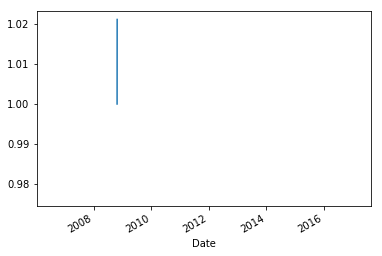

In [93]:
to_index(trade_rets).plot()

In [94]:
vol = returns.rolling( 250, min_periods=200).std() * np.sqrt(250)

def sharpe(rets, ann=250):
    return rets.mean() / rets.std()  * np.sqrt(ann)

In [95]:
cats = pd.qcut(vol, 4)
print('cats: %d, trade_rets: %d, vol: %d' % (len(cats), len(trade_rets), len(vol)))

cats: 2958, trade_rets: 2958, vol: 2958


In [96]:
trade_rets.groupby(cats).agg(sharpe)

Adj Close
(0.0734, 0.115]   -0.658074
(0.115, 0.152]     0.904984
(0.152, 0.192]     0.002473
(0.192, 0.457]    -0.399613
Name: Adj Close, dtype: float64

## More example applications

### Signal frontier analysis

In [97]:
names = ['AAPL', 'GOOG', 'MSFT', 'DELL', 'GS', 'MS', 'BAC', 'C']
def get_px(stock, start, end):
    return web.get_data_yahoo(stock, start, end)['Close']
px = DataFrame({n: get_px(n, None, None) for n in names})

RemoteDataError: Unable to read URL: https://query1.finance.yahoo.com/v7/finance/download/DELL?crumb=Uk6.K%5Cu002F3ne0r&period1=1262271600&events=history&period2=1507042799&interval=1d

In [98]:
#px = pd.read_csv('ch11/stock_px.csv')

In [99]:
plt.close('all')

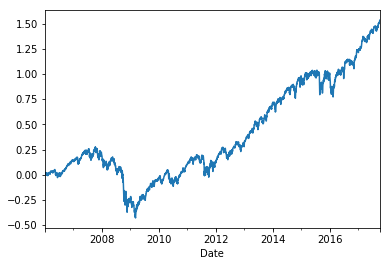

In [100]:
px = px.asfreq('B').fillna(method='pad')
rets = px.pct_change()
((1 + rets).cumprod() - 1).plot()

In [101]:
def calc_mom(price, lookback, lag):
    mom_ret = price.shift(lag).pct_change(lookback)
    ranks = mom_ret.rank(axis=1, ascending=False)
    demeaned = ranks.subtract(ranks.mean(axis=1), axis=0)
    return demeaned.divide(demeaned.std(axis=1), axis=0)

In [102]:
compound = lambda x : (1 + x).prod() - 1
daily_sr = lambda x: x.mean() / x.std()

def strat_sr(prices, lb, hold):
    # Compute portfolio weights
    freq = '%dB' % hold
    port = calc_mom(prices, lb, lag=1)

    daily_rets = prices.pct_change()

    # Compute portfolio returns
    port = port.shift(1).resample(freq, how='first')
    returns = daily_rets.resample(freq, how=compound)
    port_rets = (port * returns).sum(axis=1)

    return daily_sr(port_rets) * np.sqrt(252 / hold)

In [104]:
compound = lambda x : (1 + x).prod() - 1
daily_sr = lambda x: x.mean() / x.std()

def strat_sr(prices, lb, hold):
    # Compute portfolio weights
    freq = '%dB' % hold
    port = calc_mom(prices, lb, lag=1)

    daily_rets = prices.pct_change()

    # Compute portfolio returns
    port = port.shift(1).resample(freq).first()#, how='first')
    returns = daily_rets.resample(freq).compound()#, how=compound)
    port_rets = (port * returns).sum(axis=1)

    return daily_sr(port_rets) * np.sqrt(252 / hold)

In [105]:
strat_sr(px, 70, 30)

ValueError: No axis named 1 for object type <class 'pandas.core.series.Series'>

In [106]:
from collections import defaultdict

lookbacks = range(20, 90, 5)
holdings = range(20, 90, 5)
dd = defaultdict(dict)
for lb in lookbacks:
    for hold in holdings:
        dd[lb][hold] = strat_sr(px, lb, hold)

ddf = DataFrame(dd)
ddf.index.name = 'Holding Period'
ddf.columns.name = 'Lookback Period'

ValueError: No axis named 1 for object type <class 'pandas.core.series.Series'>

In [107]:
import matplotlib.pyplot as plt

def heatmap(df, cmap=plt.cm.gray_r):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    axim = ax.imshow(df.values, cmap=cmap, interpolation='nearest')
    ax.set_xlabel(df.columns.name)
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(list(df.columns))
    ax.set_ylabel(df.index.name)
    ax.set_yticks(np.arange(len(df.index)))
    ax.set_yticklabels(list(df.index))
    plt.colorbar(axim)

In [108]:
heatmap(ddf)

NameError: name 'ddf' is not defined

### Future contract rolling

In [109]:
pd.options.display.max_rows = 10

In [110]:
#import pandas.io.data as web
# Approximate price of S&P 500 index
px = web.get_data_yahoo('SPY')['Adj Close'] * 10
px

ImportError: The pandas.io.data module is moved to a separate package (pandas-datareader). After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.

In [113]:
from datetime import datetime
expiry = {'ESU2': datetime(2012, 9, 21),
          'ESZ2': datetime(2012, 12, 21)}
expiry = Series(expiry).order()

AttributeError: 'Series' object has no attribute 'order'

In [114]:
expiry

{'ESU2': datetime.datetime(2012, 9, 21, 0, 0),
 'ESZ2': datetime.datetime(2012, 12, 21, 0, 0)}

In [115]:
np.random.seed(12347)
N = 200
walk = (np.random.randint(0, 200, size=N) - 100) * 0.25
perturb = (np.random.randint(0, 20, size=N) - 10) * 0.25
walk = walk.cumsum()

rng = pd.date_range(px.index[0], periods=len(px) + N, freq='B')
near = np.concatenate([px.values, px.values[-1] + walk])
far = np.concatenate([px.values, px.values[-1] + walk + perturb])
prices = DataFrame({'ESU2': near, 'ESZ2': far}, index=rng)

In [116]:
prices.tail()

,ESU2,ESZ2
2018-07-03,281.570007,283.320007
2018-07-04,267.820007,270.070007
2018-07-05,275.820007,277.570007
2018-07-06,292.320007,291.570007
2018-07-09,272.320007,270.070007


In [123]:
def get_roll_weights(start, expiry, items, roll_periods=5):
    # start : first date to compute weighting DataFrame
    # expiry : Series of ticker -> expiration dates
    # items : sequence of contract names

    dates = pd.date_range(start, expiry[-1], freq='B')
    weights = DataFrame(np.zeros((len(dates), len(items))),
                        index=dates, columns=items)

    prev_date = weights.index[0]
    for i, (item, ex_date) in enumerate(expiry.iteritems()):
        if i < len(expiry) - 1:
            weights.loc[prev_date:ex_date - pd.offsets.BDay(), item] = 1
            roll_rng = pd.date_range(end=ex_date - pd.offsets.BDay(),
                                     periods=roll_periods + 1, freq='B')

            decay_weights = np.linspace(0, 1, roll_periods + 1)
            weights.loc[roll_rng, item] = 1 - decay_weights
            weights.loc[roll_rng, expiry.index[i + 1]] = decay_weights
        else:
            weights.loc[prev_date:, item] = 1

        prev_date = ex_date

    return weights

In [124]:
weights = get_roll_weights('6/1/2012', expiry, prices.columns)
weights.loc['2012-09-12':'2012-09-21']

KeyError: -1

In [125]:
rolled_returns = (prices.pct_change() * weights).sum(1)

NameError: name 'weights' is not defined

### Rolling correlation and linear regression

In [126]:
aapl = web.get_data_yahoo('AAPL', '2000-01-01')['Adj Close']
msft = web.get_data_yahoo('MSFT', '2000-01-01')['Adj Close']

aapl_rets = aapl.pct_change()
msft_rets = msft.pct_change()

In [127]:
plt.figure()

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250).corr(other=<Series>)
  """Entry point for launching an IPython kernel.


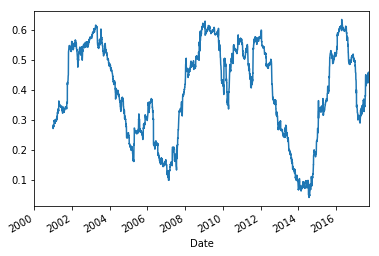

In [128]:
pd.rolling_corr(aapl_rets, msft_rets, 250).plot()

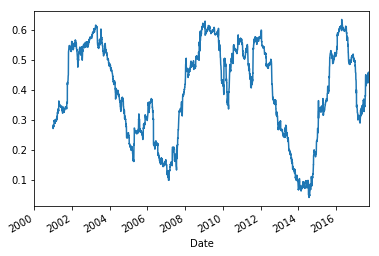

In [129]:
aapl_rets.rolling( 250).corr(msft_rets).plot()

In [130]:
plt.figure()

In [131]:
model = pd.ols(y=aapl_rets, x={'MSFT': msft_rets}, window=250)
model.beta

AttributeError: module 'pandas' has no attribute 'ols'

In [132]:
model.beta['MSFT'].plot()

NameError: name 'model' is not defined